In [1]:
# Imports
import matplotlib.pyplot as plt
from preamble import *
from DRN_interface import *
from pbarlike import *
# np.set_printoptions(precision=5)

 Loading python backend - pbarlike 1.0
 Imported required python modules - numpy, tensorflow, iminuit.Minuit
 Loaded and processed AMS-02 dataset
 Loaded required custom python modules - DRN_interface, solar_mod
     Loaded pbarlike 1.0


In [2]:
# Reusable params that give preference for DM and other default or best fit params
## Params that give DM preference for run1 + b bbar + marginalization over multinest sample
mDMrun1bb = np.array([100])
svDMrun1bb = 10**(-25.5228)
b_bbar_bf = np.array([0,0,1,0,0,0,0,0])
pmrun1 = "run1"

## Params that give DM preference for DIFF.BRK _ b bbar + marginalization
mDMdb_bb = np.array([2000])
svDMdb_bb = 6e-26
b_bbar_bf = np.array([0,0,1,0,0,0,0,0])
pmdb = "DIFF.BRK"

pp_marg = np.array([0.0])

## From example notebook
m_DM = np.array([100.])
equal_bf = np.ones((1, 8))* 1/8
def_sv = 10**(-25.5228)
pp_run1 = np.array([1.8, 1.79, 2.405, 2.357, 7.92e+03, 0.37, 2.05e+28, 0.419, 8.84, 0.09, 2.60])
pp_db = np.array([2.34, 2.28, 3.63e+28, -0.66, 0.52, -0.15, 3.83e+3, 0.4, 2.05e+5, 0.21])

## Multinest sample
ppdbmarg = np.genfromtxt('dependencies/'+ pmdb +'/multinest_sample.dat')

In [3]:
# Setting params for mock signal
DMmass = m_DM
bf = b_bbar_bf
prop_params = pp_db
sigma_v = 3e-26
prop_model = pmdb
prevent_ex = True

In [4]:
# Generating mock signal
DRN = DRNet(propagation_parameters=prop_params,propagation_model='DIFF.BRK',prevent_extrapolation=prevent_ex,data=phi_ams,errors=error_ams,cov_inv=ams_cov_inv)
DRN.preprocessing_DMparams(DM_mass=DMmass,br_fr=bf,sigma_v=sigma_v)
phi_DM_LIS = DRN.LIS_sim()
phi_DM = DRN.solar_modulation(phi_DM_LIS)
total_mock_signal = DRN.TOA_sim(phi_DM_LIS=phi_DM_LIS) #phi_DM + phi_ams


 The simulation tool has been initiated. 



/home/sowmiya/Research/pbar_logLike/DRN_interface.py:241: RuntimeWarning: divide by zero encountered in log
  phi_LIS_interp = np.exp(np.interp(np.log(E_LIS_ams),np.log(E_drn),np.log(phi_LIS)))


In [5]:
# Setting same params for mock signal analysis
DMmass = m_DM
bf = b_bbar_bf
prop_params = pp_db
sigma_v = 3e-26
prop_model = pmdb
prevent_ex = True

In [6]:
# Predicted signal for analysis at fiducial point
DRN = DRNet(propagation_parameters=prop_params,propagation_model=prop_model,prevent_extrapolation=prevent_ex,data = total_mock_signal[0],errors=error_ams,cov_inv=ams_cov_inv)
DRN.preprocessing_DMparams(DM_mass=DMmass,br_fr=bf,sigma_v=sigma_v)
phi_DM_LIS = DRN.LIS_sim()
phi_DMCR = DRN.TOA_sim(phi_DM_LIS=phi_DM_LIS)
del_chi2 = DRN.del_chi2(phi_DMCR)
del_chi2_corr = DRN.del_chi2_corr(phi_DMCR)
result = {'uncorrelated' : del_chi2 , 'correlated' : del_chi2_corr}


 The simulation tool has been initiated. 



In [7]:
# Results
print('del_chi2 = ', result["uncorrelated"])
print('del_chi_cov = ', result["correlated"])

del_chi2 =  32.96136874691482
del_chi_cov =  16.580677554391894


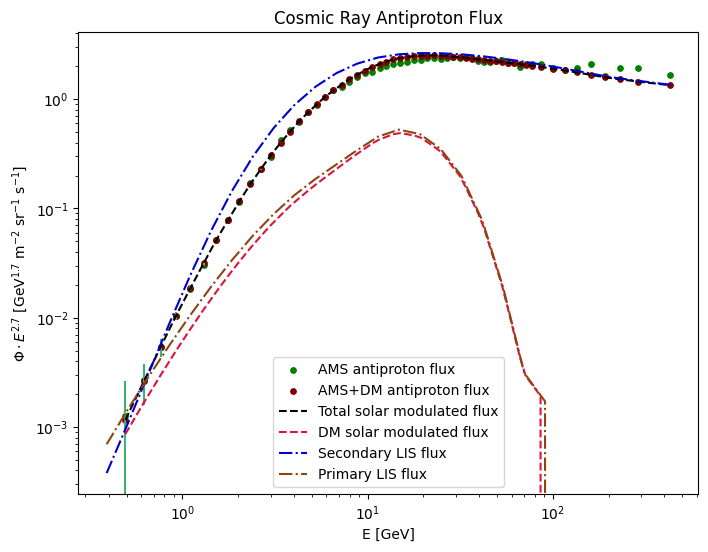

In [8]:
# Plot of solar modulated DM+CR flux at fiducial point and AMS flux
DM_LIS = phi_DM_LIS[0]
S_flux = DRN.phi_CR_LIS[0]
DMCR_flux = phi_DMCR[0]

DM_E = E_ams
S_E = E_ams

plt.figure(figsize=(8,6))
plt.title('Cosmic Ray Antiproton Flux')
plt.scatter(E_ams, E_ams**2.7 * phi_ams,s = 15, label = 'AMS antiproton flux',c='green')
plt.scatter(E_ams, E_ams**2.7 * total_mock_signal[0],s = 15, label = 'AMS+DM antiproton flux', c='maroon')
plt.errorbar(E_ams,E_ams**2.7*phi_ams,error_ams,linestyle = '', c= 'mediumseagreen')
plt.plot(DM_E, DM_E**2.7 * DMCR_flux, linestyle = 'dashed', label = 'Total solar modulated flux',  c = 'black')
plt.plot(E_ams,E_ams**2.7* phi_DM[0], linestyle = 'dashed', label = 'DM solar modulated flux', c='crimson')
plt.plot(E_drn, E_drn**2.7 * S_flux, linestyle = 'dashdot', label = 'Secondary LIS flux ',c='mediumblue')
plt.plot(E_drn, E_drn**2.7 * DM_LIS, linestyle = 'dashdot', label = 'Primary LIS flux',c='saddlebrown')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\Phi \cdot E^{2.7}$ [GeV$^{1.7}$ m$^{-2}$ sr$^{-1}$ s$^{-1}$]')
plt.xlabel('E [GeV]')
plt.show()

In [9]:
# Mock signal analysis at different cross-sections
sv = 10**(np.linspace(-27,-25,20))
chisquares_run1 = [py_pbarlike(DM_mass=DMmass,brfr=bf,propagation_parameters=prop_params,sigma_v=i,propagation_model='run1',prevent_extrapolation=prevent_ex,data=total_mock_signal[0]) for i in sv]
chisquares_db = [py_pbarlike(DM_mass=DMmass,brfr=bf,propagation_parameters=prop_params,sigma_v=i,propagation_model='DIFF.BRK',prevent_extrapolation=prevent_ex,data=total_mock_signal[0]) for i in sv]
chisquares_ib = [py_pbarlike(DM_mass=DMmass,brfr=bf,propagation_parameters=prop_params,sigma_v=i,propagation_model='INJ.BRK+vA',prevent_extrapolation=prevent_ex,data=total_mock_signal[0]) for i in sv]


The number of propagation parameters is not consistent with the propagation model. The default multinest sample will be used for marginalization.

 The simulation tool has been initiated. 

The number of propagation parameters is not consistent with the propagation model. The default multinest sample will be used for marginalization.

 The simulation tool has been initiated. 

The number of propagation parameters is not consistent with the propagation model. The default multinest sample will be used for marginalization.

 The simulation tool has been initiated. 

The number of propagation parameters is not consistent with the propagation model. The default multinest sample will be used for marginalization.

 The simulation tool has been initiated. 

The number of propagation parameters is not consistent with the propagation model. The default multinest sample will be used for marginalization.

 The simulation tool has been initiated. 

The number of propagation parameters is not consis

In [10]:
# log likelihood ratios
chiuc_run1 = [chisquares_run1[i]['uncorrelated'] for i in range(20)]
chiuc_db = [chisquares_db[i]['uncorrelated'] for i in range(20)]
chiuc_ib = [chisquares_ib[i]['uncorrelated'] for i in range(20)]
chic_run1 = [chisquares_run1[i]['correlated'] for i in range(20)]
chic_db = [chisquares_db[i]['correlated'] for i in range(20)]
chic_ib = [chisquares_ib[i]['correlated'] for i in range(20)]

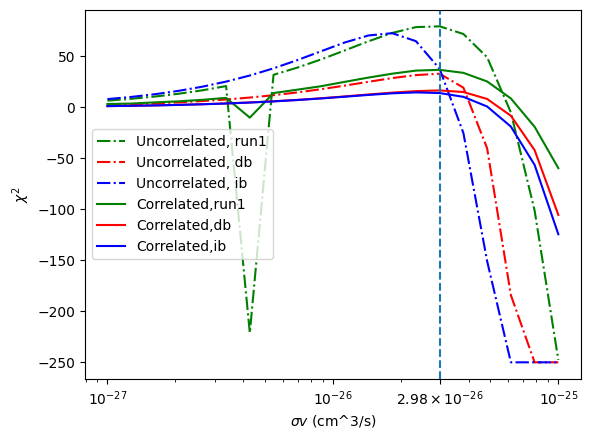

In [11]:
# Plot of chi^2 vs cross-sections
fig,ax = plt.subplots()
ax.plot(sv, chiuc_run1,label='Uncorrelated, run1',ls='-.',c='g')
ax.plot(sv, chiuc_db,label='Uncorrelated, db',ls='-.',c='r')
ax.plot(sv, chiuc_ib,label='Uncorrelated, ib',ls='-.',c='b')
ax.plot(sv, chic_run1,label = 'Correlated,run1',c='g')
ax.plot(sv, chic_db,label = 'Correlated,db',c='r')
ax.plot(sv, chic_ib,label = 'Correlated,ib',c='b')
ax.axvline(sv[np.where(np.amax(chiuc_db)==chiuc_db)[0][0]],ls='--')
ax.set_xscale('log')
t = ax.get_xticks()[2:-2].copy()
t = (np.insert(t,0,sv[np.where(np.amax(chiuc_db)==chiuc_db)[0][0]])).copy()
labs = [r'$10^{'+j[1] +'}$' if j[0]=='1.' else r'$'+j[0]+r' \times 10^{'+j[1] +r'}$' for j in [np.format_float_scientific(i,2).split('e') for i in t]]
ax.set_xticks(t,labels=labs)
ax.set_xlabel(r'$\sigma v$ (cm^3/s)')
ax.set_ylabel(r'$\chi^2$')
ax.legend()
fig.savefig('temp.png')